In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# conductance for K, Na and R in mS/cm^2
g = np.asarray([36, 120, 0.3])
l = [r'$g_K$', r'$g_{Na}$', r'$g_L$']

# Battery voltage for n, m and h
E = np.asarray([-12, 115, 10.613])

In [3]:

# Init of useful variables
##########################
I_ext = 0.
I_ext_applied = 10

# initial membrane potential
V = -10
x = np.asarray([0., 0., 1.],dtype=np.float32)

Alpha = np.zeros(3)
Beta = np.zeros(3)
gnmh = np.zeros(3)


# Time-step
dt = 0.01
# Simulation time
ts = np.arange(-30, 50, dt)
Vs = np.zeros_like(ts)
gnmhs = np.zeros((Vs.size, 3))
Is = np.zeros_like(ts)

In [4]:
#####################
## Start simulation
#####################
for i, t in enumerate(ts):
    if t>=40:
        I_ext = 0
    elif t>=10.:
        I_ext = I_ext_applied
        
    # Compute alpha and beta for solving differential eq
    Alpha[0] = (10-V)/(100*(np.exp((10-V)/10)-1))
    Alpha[1] = (25-V)/(10*(np.exp((25-V)/10)-1))
    Alpha[2] = 0.07 * np.exp(-V/20)
    
    Beta[0] = 0.125 * np.exp(-V/80)
    Beta[1] = 4 * np.exp(-V/18)
    Beta[2] = 1/(np.exp((30-V)/10)+1)
    
    # Solving first-order differential equation using simple Euler's method
    tau = 1 / (Alpha+Beta)
    x_0 = Alpha * tau
    x = (1-dt/tau)*x+dt/tau*x_0
    
    # Compute conductances
    gnmh[0] = g[0]*(x[0]**4)
    gnmh[1] = g[1]*(x[1]**3)*x[2]
    gnmh[2] = g[2]
    
    
    # Now apply Ohm's law:
    I = gnmh * (V-E)
    
    # and update now the membrane voltage
    V = V + dt * (I_ext - I.sum())

    # Save conductances and voltages
    gnmhs[i] = gnmh
    Vs[i] = V

# Plot results

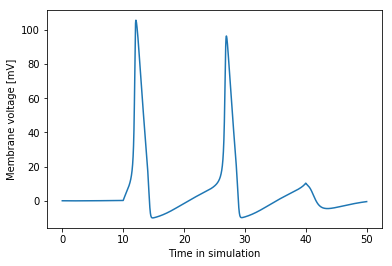

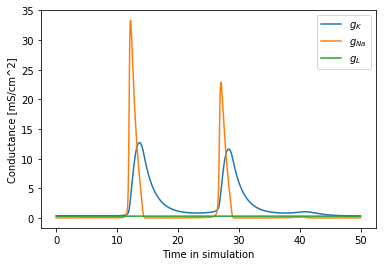

In [5]:
plt.figure()
plt.plot(ts[ts>0], Vs[ts>0])
plt.xlabel("Time in simulation")
plt.ylabel("Membrane voltage [mV]")
plt.figure()
for i in range(3):
    plt.plot(ts[ts>0], gnmhs[:,i][ts>0], label=l[i])
    
plt.xlabel("Time in simulation")
plt.ylabel("Conductance [mS/cm^2]")
plt.legend(loc='best')

Python code adapted from Trappenberg, Fundamentals of Computational Neuroscience